<a href="https://colab.research.google.com/github/Monika9763/Jeremy-Howard-Squadron-/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [7]:
df = pd.read_csv("/content/drive/MyDrive/My document/G10.csv")

In [8]:
df['Date']= pd.to_datetime(df['Date'])
df['Date']

0      2021-01-08
1      2021-01-09
2      2021-01-10
3      2021-01-11
4      2021-01-12
          ...    
1265   2024-06-26
1266   2024-06-27
1267   2024-06-28
1268   2024-06-29
1269   2024-06-30
Name: Date, Length: 1270, dtype: datetime64[ns]

In [9]:
df.head()

,Date,Guess in 10 - Animal Planet
0,2021-01-08,0.0
1,2021-01-09,0.0
2,2021-01-10,0.0
3,2021-01-11,0.0
4,2021-01-12,0.0


In [10]:
df.tail()

,Date,Guess in 10 - Animal Planet
1265,2024-06-26,0.0
1266,2024-06-27,0.0
1267,2024-06-28,0.0
1268,2024-06-29,0.0
1269,2024-06-30,0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         1270 non-null   datetime64[ns]
 1   Guess in 10 - Animal Planet  1270 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.0 KB


In [12]:
df.isnull().sum()*100/len(df)

Date                           0.0
Guess in 10 - Animal Planet    0.0
dtype: float64

In [13]:
df.duplicated().sum()

0

In [14]:
df.set_index('Date',inplace=True)

In [15]:
df.head(3)

,Guess in 10 - Animal Planet
Date,
2021-01-08,0.0
2021-01-09,0.0
2021-01-10,0.0


In [16]:
ts = df['Guess in 10 - Animal Planet']

## visualize the data

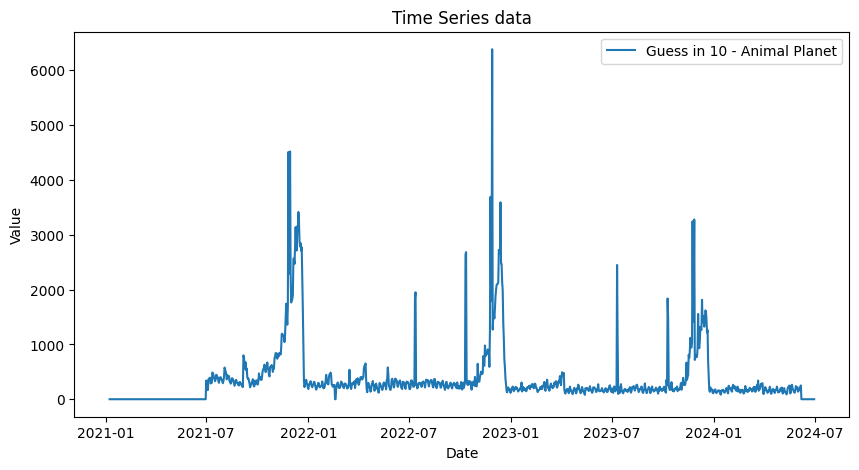

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(df, label='Guess in 10 - Animal Planet')
plt.title('Time Series data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [18]:
rolling_mean = df.rolling(window=12).mean()
rolling_std = df.rolling(window=12).std()


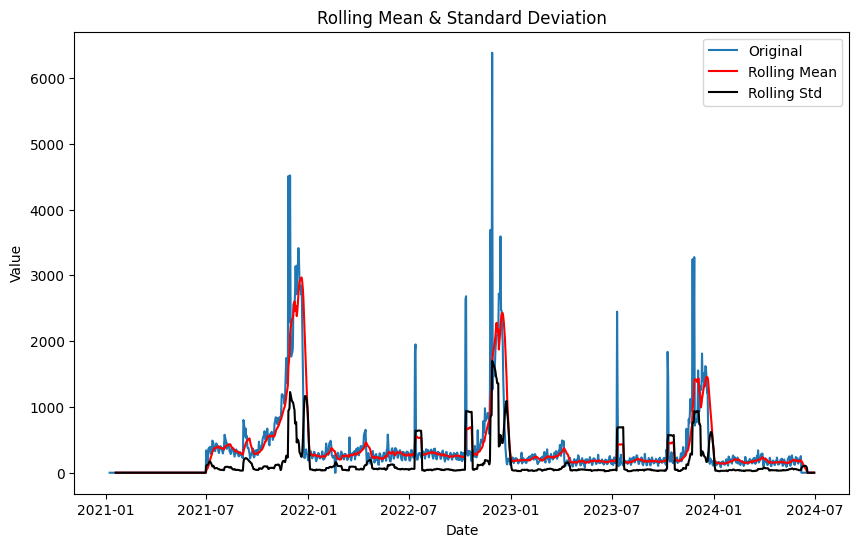

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(df, label='Original')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='black')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [20]:
df.columns

Index(['Guess in 10 - Animal Planet'], dtype='object')

In [21]:
from statsmodels.tsa.stattools import adfuller, kpss


In [22]:
result_adf = adfuller(ts)
print('ADF Statistic:', result_adf[0])
print('p-value:', result_adf[1])
for key, value in result_adf[4].items():
    print(f'Critical Value {key}: {value}')

ADF Statistic: -4.547897658930466
p-value: 0.0001609554168353111
Critical Value 1%: -3.4355381554821585
Critical Value 5%: -2.8638311143598556
Critical Value 10%: -2.567989813198476


In [23]:
if result_adf[1] < 0.05:
    print("Reject the null hypothesis - the series is stationary")
else:
    print("Fail to reject the null hypothesis - the series is non-stationary")

Reject the null hypothesis - the series is stationary


## Split the data into training and testing sets

In [24]:
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

In [25]:
# Define the p, d, and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

In [26]:
from itertools import product

In [27]:
pdq = list(product(p, d, q))

In [28]:
# Initialize a variable to store the best parameters and lowest RMSE
best_rmse = float("inf")
best_order = None


In [29]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [30]:
for param in pdq:
    try:
        model = ARIMA(train, order=param)
        model_fit = model.fit()
        predictions = model_fit.forecast(steps=len(test))

        # Check if predictions are None
        if predictions is None:
            print(f"ARIMA{param} - Predictions are None")
            continue

        rmse = mean_squared_error(test, predictions, squared=False)

        if rmse < best_rmse:
            best_rmse = rmse
            best_order = param

        print(f"ARIMA{param} - RMSE: {rmse}")
    except Exception as e:
        print(f"ARIMA{param} - Exception: {e}")
        continue

print(f'Best ARIMA{best_order} - RMSE: {best_rmse}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0) - RMSE: 457.1791605005371


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1) - RMSE: 457.0146058568865


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2) - RMSE: 456.98795716514223
ARIMA(0, 1, 0) - RMSE: 476.8697679561488


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

ARIMA(0, 1, 1) - RMSE: 474.8711165816855


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 2) - RMSE: 469.25183075378123
ARIMA(0, 2, 0) - RMSE: 3834.208602858773


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

ARIMA(0, 2, 1) - RMSE: 476.4673508055535


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 2, 2) - RMSE: 474.8354930937713
ARIMA(1, 0, 0) - RMSE: 455.97993281659967


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

ARIMA(1, 0, 1) - RMSE: 462.4507723945108


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2) - RMSE: 464.7532896699155
ARIMA(1, 1, 0) - RMSE: 478.8475964332589


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

ARIMA(1, 1, 1) - RMSE: 470.73138371546355


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2) - RMSE: 472.4893835382042
ARIMA(1, 2, 0) - RMSE: 612.2853028299248


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

ARIMA(1, 2, 1) - RMSE: 478.17597870849346


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  

ARIMA(1, 2, 2) - RMSE: 471.3993841595715
ARIMA(2, 0, 0) - RMSE: 456.37633886956013


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

ARIMA(2, 0, 1) - RMSE: 463.9732826066888


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2) - RMSE: 464.0960832191819


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(2, 1, 0) - RMSE: 477.9866100093704


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1) - RMSE: 480.4197735128604


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(2, 1, 2) - RMSE: 478.57619374410064
ARIMA(2, 2, 0) - RMSE: 4903.009765608252


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

ARIMA(2, 2, 1) - RMSE: 477.42355537039276


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(2, 2, 2) - RMSE: 479.54159522416984
Best ARIMA(1, 0, 0) - RMSE: 455.97993281659967


In [31]:
model = ARIMA(train, order=best_order)
model_fit = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


## Make predictions

In [32]:
predictions = model_fit.forecast(steps=len(test))
test_predictions = pd.Series(predictions, index=test.index)


In [37]:
test = pd.DataFrame(test) # Convert test Series to DataFrame
test['Predictions'] = test_predictions # Add predictions as a column to test DataFrame


## calculate RMSE

## Evaluate the model using RMSE

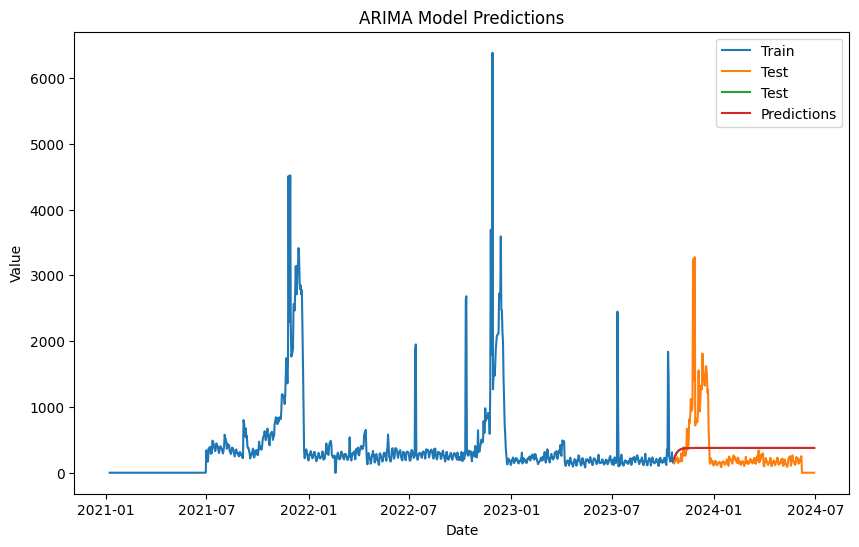

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train.values, label='Train')  # Plot train data with index as x-axis
plt.plot(test.index[:-1], test.values[:-1], label='Test')  # Plot test data, excluding 'Predictions'
plt.plot(test.index[:-1], test['Predictions'][:-1], label='Predictions')  # Plot predictions against the same index as test data, excluding the last value
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

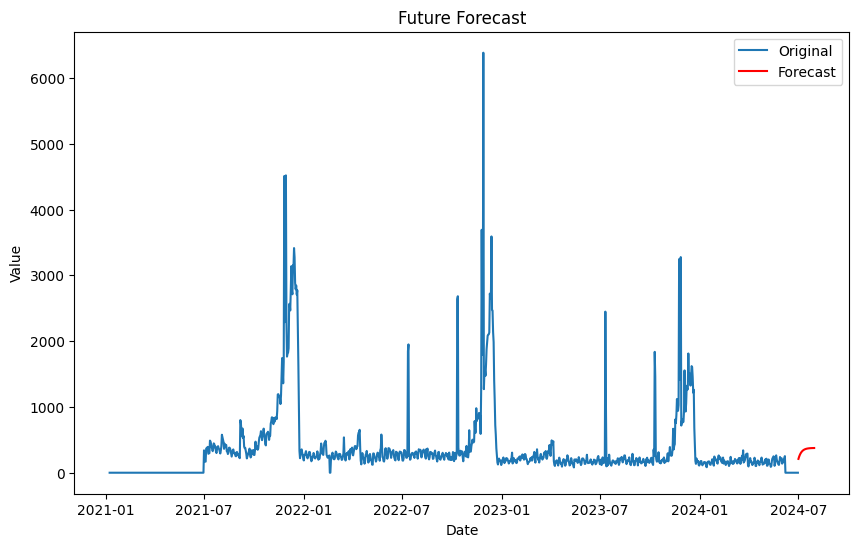

In [39]:
# Forecast future values
forecast_steps = 30  # Number of future days to forecast
forecast = model_fit.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(start=ts.index[-1] + pd.DateOffset(days=1), periods=forecast_steps)

plt.figure(figsize=(10, 6))
plt.plot(ts, label='Original')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title('Future Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## fit a SARIMA Model

In [40]:
import numpy as np

In [41]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [42]:
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [43]:
predictions = sarima_fit.forecast(steps=len(test))

In [44]:
predictions = pd.Series(predictions, index=test.index)


In [45]:
print(f"Predictions:\n{predictions}")


Predictions:
Date
2023-10-21    184.833487
2023-10-22    188.470653
2023-10-23    249.405885
2023-10-24    209.836011
2023-10-25    186.794154
                 ...    
2024-06-26    313.444546
2024-06-27    251.186942
2024-06-28    232.672358
2024-06-29    235.230391
2024-06-30    248.453674
Name: predicted_mean, Length: 254, dtype: float64


In [46]:
test = test.copy()
test['Predictions'] = predictions

In [47]:
print(f"Test Data with Predictions:\n{test.head()}")


Test Data with Predictions:
            Guess in 10 - Animal Planet  Predictions
Date                                                
2023-10-21                        142.0   184.833487
2023-10-22                        154.0   188.470653
2023-10-23                        194.0   249.405885
2023-10-24                        189.0   209.836011
2023-10-25                        204.0   186.794154


In [48]:
test['Predictions'] = predictions

In [49]:
test['Predictions'] = pd.to_numeric(test['Predictions'], errors='coerce')

In [50]:
rmse = mean_squared_error(test['Guess in 10 - Animal Planet'], test['Predictions'], squared=False)
print(f'RMSE: {rmse}')


RMSE: 471.8025968560128


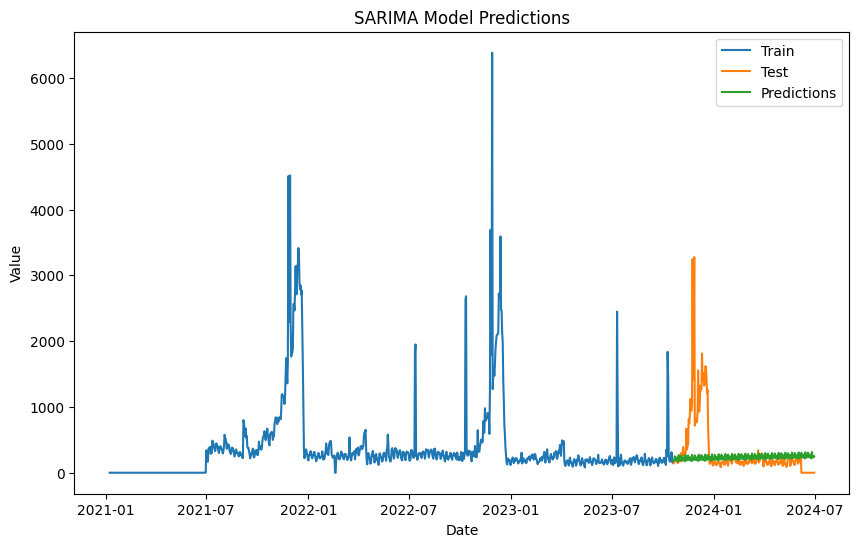

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test['Guess in 10 - Animal Planet'], label='Test')
plt.plot(test['Predictions'], label='Predictions')
plt.title('SARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


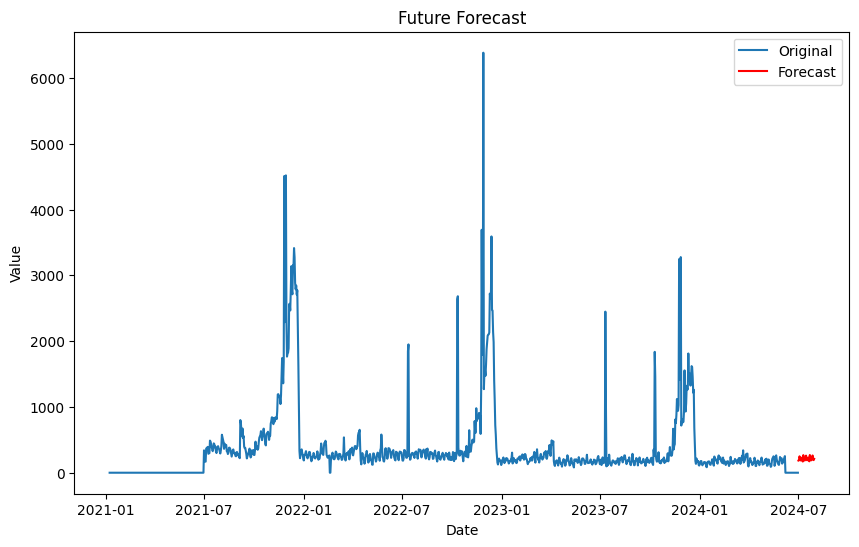

In [52]:
forecast_steps = 30  # Number of future days to forecast
forecast = sarima_fit.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(start=ts.index[-1], periods=forecast_steps + 1, inclusive='right')

plt.figure(figsize=(10, 6))
plt.plot(ts, label='Original')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title('Future Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## Fit an LSTM Model

In [53]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [55]:
# Extract the time series column
ts = df['Guess in 10 - Animal Planet'].values.reshape(-1, 1)


In [56]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
ts_scaled = scaler.fit_transform(ts)


In [57]:
# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 30
X, y = create_sequences(ts_scaled, seq_length)


In [58]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [59]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))


In [60]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [61]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
25/25 [==============================] - 8s 72ms/step - loss: 0.0069 - val_loss: 0.0015
Epoch 2/20
25/25 [==============================] - 1s 29ms/step - loss: 0.0045 - val_loss: 0.0015
Epoch 3/20
25/25 [==============================] - 1s 29ms/step - loss: 0.0040 - val_loss: 0.0019
Epoch 4/20
25/25 [==============================] - 1s 31ms/step - loss: 0.0038 - val_loss: 0.0015
Epoch 5/20
25/25 [==============================] - 1s 30ms/step - loss: 0.0035 - val_loss: 0.0015
Epoch 6/20
25/25 [==============================] - 1s 30ms/step - loss: 0.0034 - val_loss: 0.0015
Epoch 7/20
25/25 [==============================] - 1s 33ms/step - loss: 0.0035 - val_loss: 0.0015
Epoch 8/20
25/25 [==============================] - 1s 30ms/step - loss: 0.0032 - val_loss: 0.0016
Epoch 9/20
25/25 [==============================] - 1s 30ms/step - loss: 0.0032 - val_loss: 0.0015
Epoch 10/20
25/25 [==============================] - 1s 29ms/step - loss: 0.0031 - val_loss: 0.0015
Epoch 11/

In [62]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

8/8 [==============================] - 5s 21ms/step


In [63]:
# Calculate RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'RMSE: {rmse}')


RMSE: 255.24890776579772


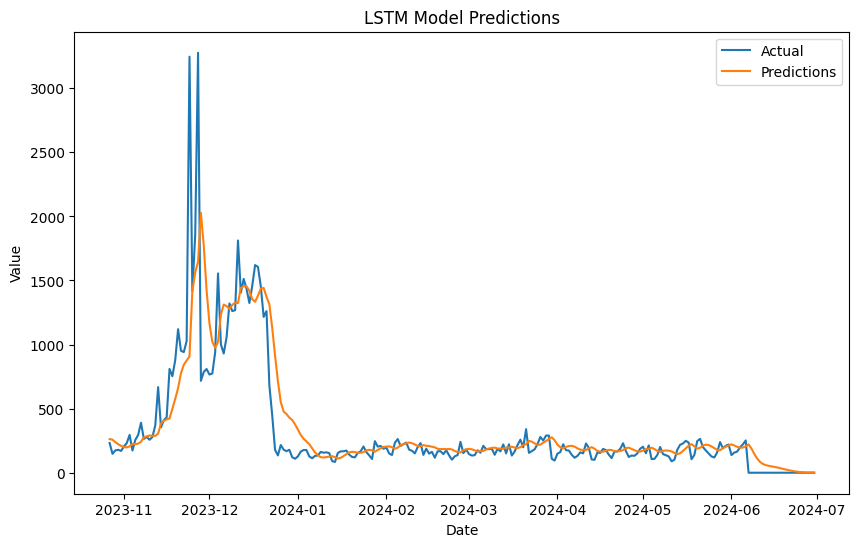

In [65]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual')
plt.plot(df.index[-len(y_test):], predictions, label='Predictions')
plt.title('LSTM Model Predictions')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


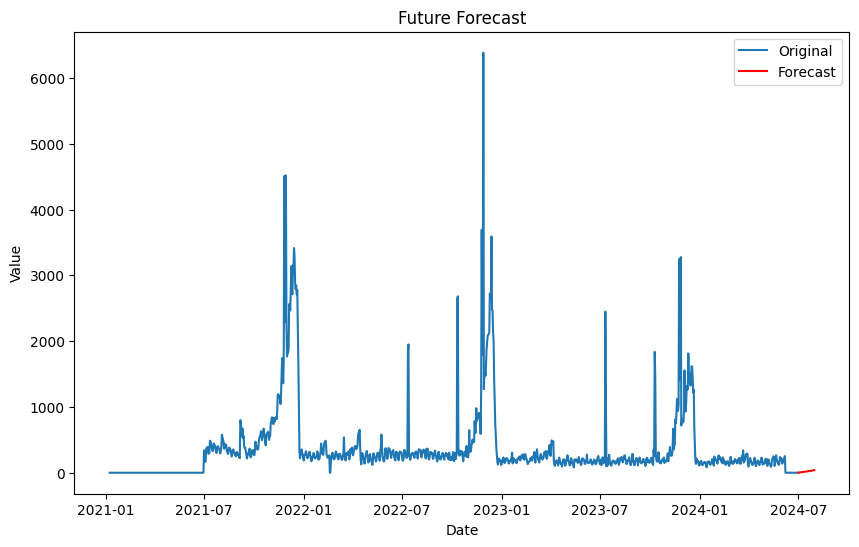

In [73]:
# Forecast future values
forecast_steps = 30
input_seq = ts_scaled[-seq_length:]
forecast = []

for _ in range(forecast_steps):
    input_seq = input_seq.reshape((1, seq_length, 1))
    pred = model.predict(input_seq, verbose=0)
    forecast.append(pred[0, 0])
    input_seq = np.append(input_seq[:, 1:, :], pred[0].reshape(1, 1, 1), axis=1)


forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))
forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, inclusive='right')

plt.figure(figsize=(10, 6))
plt.plot(df.index, ts, label='Original')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title('Future Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()